In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

CNN on CIFAR-10

In [32]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [34]:
cifar10model = tf.keras.Sequential()
cifar10model.add(tf.keras.Input(shape=(32,32,3)))
cifar10model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
cifar10model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
cifar10model.add(tf.keras.layers.Flatten(name="Input"))
cifar10model.add(tf.keras.layers.Dense(100,activation="relu", name="HiddenLayer1"))
cifar10model.add(tf.keras.layers.Dense(10,activation="softmax", name="Output"))
cifar10model.summary()
cifar10model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cifar10plot = cifar10model.fit(x_train,y_train,batch_size=25,epochs=15, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 Input (Flatten)             (None, 7200)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               720100    
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
________________________________________________

Training Accuracy = 73.48%

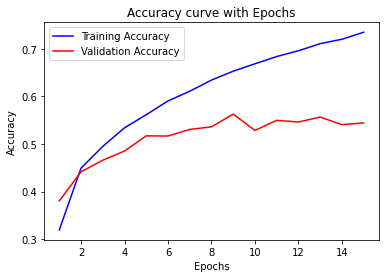

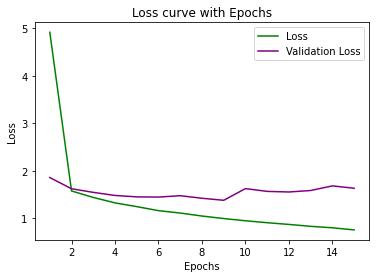

In [36]:
# Plotting and Visualising

cifar10acc = cifar10plot.history["accuracy"]
cifar10val_acc = cifar10plot.history["val_accuracy"]
cifar10lss = cifar10plot.history["loss"]
cifar10val_lss = cifar10plot.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(epochs_list, cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [37]:
cifar10model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6472 - accuracy: 0.5408


[1.6471798419952393, 0.5407999753952026]

Testing Accuracy = 54.08%

In [38]:
y_pred_cifar10 = cifar10model.predict(x_test)
y_pred_cifar10

array([[2.2130237e-04, 2.3866865e-04, 1.9053711e-06, ..., 1.0278759e-07,
        1.5760481e-04, 8.1760305e-07],
       [4.7220397e-03, 1.6155913e-02, 6.4431491e-09, ..., 5.8567547e-11,
        9.7886068e-01, 2.6122073e-04],
       [7.6927519e-01, 1.2549697e-02, 3.0323949e-02, ..., 8.3729744e-02,
        8.0878399e-02, 1.5318447e-02],
       ...,
       [1.1354546e-05, 1.6716098e-05, 1.6553296e-01, ..., 1.1803312e-01,
        5.5671939e-05, 2.1662316e-05],
       [4.9015526e-02, 8.1241578e-03, 4.6013158e-02, ..., 1.8128265e-02,
        2.8996404e-02, 5.0991420e-03],
       [1.5057267e-05, 2.7282402e-07, 1.7705288e-03, ..., 9.8410058e-01,
        5.4744345e-07, 1.2548949e-06]], dtype=float32)

**On CIFAR-10 dataset**

CNN Model gives test accuracy (54.08%)

